# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [1]:
from scipy.stats import binom, norm, uniform
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [3]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo

# Para asegurar que los resultados aleatorios sean reproducibles al obtener los mismos cada vez que se ejecuta
np.random.seed(42)

# Evaluar las funciones e imprimir los resultados
print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


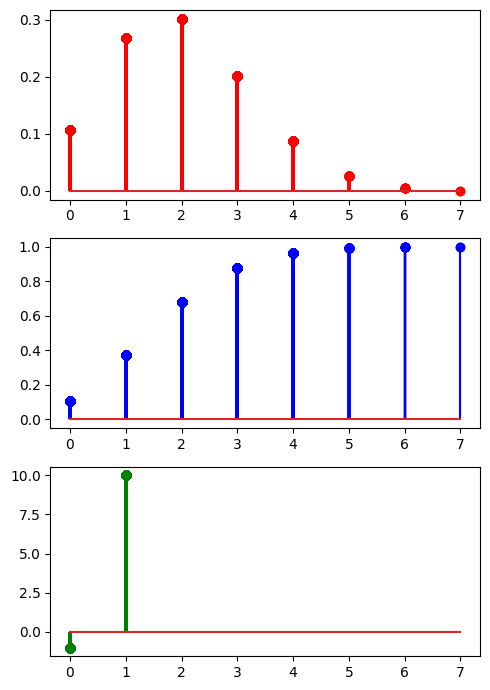

In [4]:
# Generar graficas
np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

## 1) Distribución normal

In [ ]:
# Definir todas las funciones de probabilidad relacionadas con la distribucion binomial.

def dnorm(x, media, ds):
    """
    Calcula la estimación puntual de la distribución normal.
    """
    result_norm = norm.pdf(x, loc=media, scale=ds)

    return result_norm

def pnorm(x, media, ds):
    """
    Calcula el acumulado de la distribución normal.
    """
    result_norm  = norm.cdf(x, loc=media, scale=ds)

    return result_norm

def qnorm(p, media, ds):
    """
    Calcula la función cuantil a partir de la distribución normal.
    """
    result_norm = norm.ppf(p, loc=media, scale=ds)

    return result_norm

def rnorm(n, media, ds):
    """
    Genera variables aleatorias a partir de la distribución normal.
    """
    result_norm = norm.rvs(loc=media, scale=ds, size=n)

    return result_norm

In [12]:
# Distribución normal (0, 1), dónde la media = 0  y la desviacion estandar = 1 

# Para asegurar que los resultados aleatorios sean reproducibles al obtener los mismos cada vez que se ejecuta
np.random.seed(42)

# Evaluamos las funciones creadas para los valores expresados a continuación
print(f"Probabilidad de que Normal(0, 1) tome el valor de 2: {dnorm(2, 0, 1)}")
print(f"Probabilidad de que Normal(0, 1) tome un valor menor que 2: {pnorm(2, 0, 1)}")
print(f"En que valor se debe evaluar Normal(0, 1) para que tenga la probabilidad de 0.9? {qnorm(0.9, 0, 1)}")
print(f"Generar 2000 valores randon de distribución Normal(0, 1): {rnorm(2000, 0, 1)}")

Probabilidad de que Normal(0, 1) tome el valor de 2: 0.05399096651318806
Probabilidad de que Normal(0, 1) tome un valor menor que 2: 0.9772498680518208
En que valor se debe evaluar Normal(0, 1) para que tenga la probabilidad de 0.9? 1.2815515655446004
Generar 2000 valores randon de distribución Normal(0, 1): [ 0.49671415 -0.1382643   0.64768854 ... -0.88187465 -0.16306696
 -0.74490264]


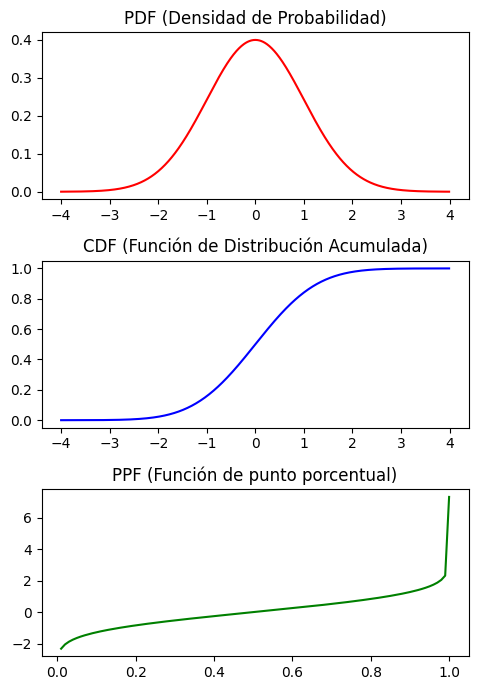

In [ ]:
# Generar graficas
np.random.seed(42)

# Esatablecemos los valores a usar en las funciones y el rango
media = 0
ds = 1
data = np.arange(-4, 4, 0.01)

# Evaluamos las funciones con las anteriores variables
pdf = dnorm(data, media=media, ds=ds)
cdf = pnorm(data, media=media, ds=ds)
ppf = qnorm(data, media=media, ds=ds)

# Indicamos que serán 3 graficas en una columna y el tamaño de la grafica
fig, axis = plt.subplots(3, 1, figsize = (5, 7))

# Se asigna la funcion a cada grafica y se le indica un color a cada linea a generar
axis[0].plot(data, pdf, "r-")
axis[1].plot(data, cdf, "b-")
axis[2].plot(data, ppf, "g-")

# Se agragan titulos a las graficas
axis[0].set_title("PDF (Densidad de Probabilidad)")
axis[1].set_title("CDF (Función de Distribución Acumulada)")
axis[2].set_title("PPF (Función de punto porcentual)")

# Ajustamos el modo en el que se distribuyen los elementos
plt.tight_layout()

# Mostramos la grafica
plt.show()

Observaciones: <br> Se genera la gráfica de densidad de probabilidad para distribucion normal para valores de media = 0 y desviacion estandar de 1, obteniendo la tipica curva de la campana de Gauss donde su punto central esta en la media establecida, es decir 0. Tambien se generan las graficas de distribucion acumulada y punto porcentual que responden a la probabilidad hay de obtener un valor hasta tal x y que valor de x dada cierta probabilidad acumulada respectivamente.

## 2. Distribución uniforme

In [10]:
# Definir todas las funciones de probabilidad relacionadas con la distribucion uniforme.

def duniform(x, inicio, tamano):
    """
    Calcula la estimación puntual de la distribución uniforme.
    """
    result_uniform = uniform.pdf(x, loc=inicio, scale=tamano)

    return result_uniform

def puniform(x, inicio, tamano):
    """
    Calcula el acumulado de la distribución uniforme.
    """
    result_uniform = uniform.cdf(x, loc=inicio, scale=tamano)

    return result_uniform

def quniform(q, inicio, tamano):
    """
    Calcula la función cuantil de la distribución uniforme.
    """
    result_uniform = uniform.ppf(q, loc=inicio, scale=tamano)

    return result_uniform

def runiform(n, inicio, tamano):
    """
    Genera variables aleatorias a partir de la distribución uniforme.
    """
    result_uniform = uniform.rvs(loc=inicio, scale=tamano, size=n)

    return result_uniform

In [11]:
# Distribución uniforme (0, 1), dónde el inicio del intervalo = 0  y el tamaño del intervalo  = 1 

# Para asegurar que los resultados aleatorios sean reproducibles al obtener los mismos cada vez que se ejecuta
np.random.seed(42)

# Evaluamos las funciones creadas para los valores expresados a continuación
print(f"Probabilidad de que Uniforme(0, 1) tome el valor de 2: {duniform(2, 0, 1)}")
print(f"Probabilidad de que Uniforme(0, 1) tome un valor menor que 2: {puniform(2, 0, 1)}")
print(f"En que valor se debe evaluar Uniforme(0, 1) para que tenga la probabilidad de 0.9? {quniform(0.9, 0, 1)}")
print(f"Generar 2000 valores randon de la distribución Uniforme(0, 1): {runiform(2000, 0, 1)}")

Probabilidad de que Uniforme(0, 1) tome el valor de 2: 0.0
Probabilidad de que Uniforme(0, 1) tome un valor menor que 2: 1.0
En que valor se debe evaluar Uniforme(0, 1) para que tenga la probabilidad de 0.9? 0.9
Generar 2000 valores randon de la distribución Uniforme(0, 1): [0.37454012 0.95071431 0.73199394 ... 0.06895802 0.05705472 0.28218707]


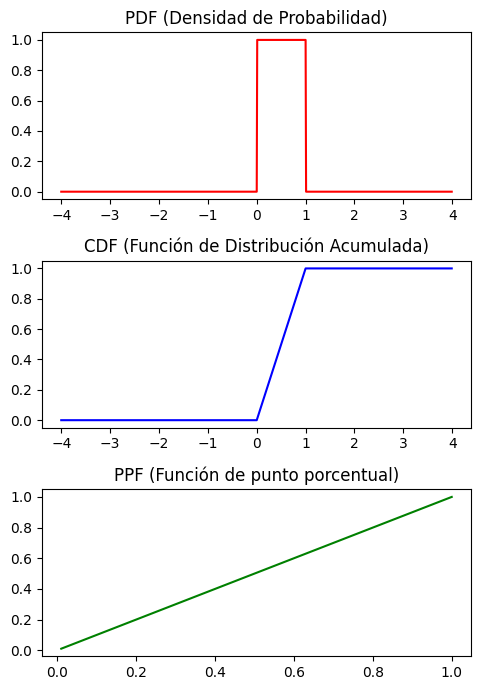

In [19]:
# Generar graficas
np.random.seed(42)

# Esatablecemos los valores a usar en las funciones y el rango
inicio = 0
tamano = 1
data = np.arange(-4, 4, 0.01)

# Evaluamos las funciones con las anteriores variables
pdf = duniform(data, inicio, tamano)
cdf = puniform(data, inicio, tamano)
ppf = quniform(data, inicio, tamano)

# Indicamos que serán 3 graficas en una columna y el tamaño de la grafica
fig, axis = plt.subplots(3, 1, figsize = (5, 7))

# Se asigna la funcion a cada grafica y se le indica un color a cada linea a generar
axis[0].plot(data, pdf, "r-")
axis[1].plot(data, cdf, "b-")
axis[2].plot(data, ppf, "g-")

# Se agragan titulos a las graficas
axis[0].set_title("PDF (Densidad de Probabilidad)")
axis[1].set_title("CDF (Función de Distribución Acumulada)")
axis[2].set_title("PPF (Función de punto porcentual)")

# Ajustamos el modo en el que se distribuyen los elementos
plt.tight_layout()

# Mostramos la grafica
plt.show()

Observaciones: <br> Se genera la gráfica de densidad de probabilidad para distribucion uniforme para valores de punto inicial = 0 y tamaño de 1, obteniendo una linea recta sin pendiente entre los intervalos indicados 0 y 1, ya que en ellos para esta distribucion las probabilidades son iguales. Tambien se generan las graficas de distribucion acumulada y punto porcentual que responden a la probabilidad hay de obtener un valor hasta tal x y que valor de x dada cierta probabilidad acumulada respectivamente.